In [2]:
library(igraph)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



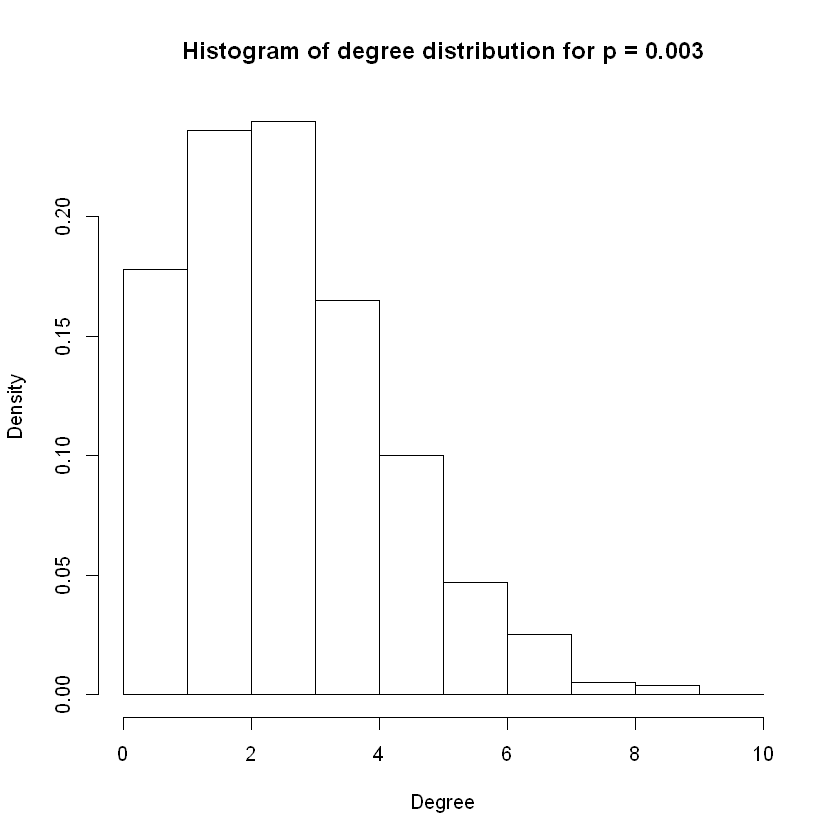

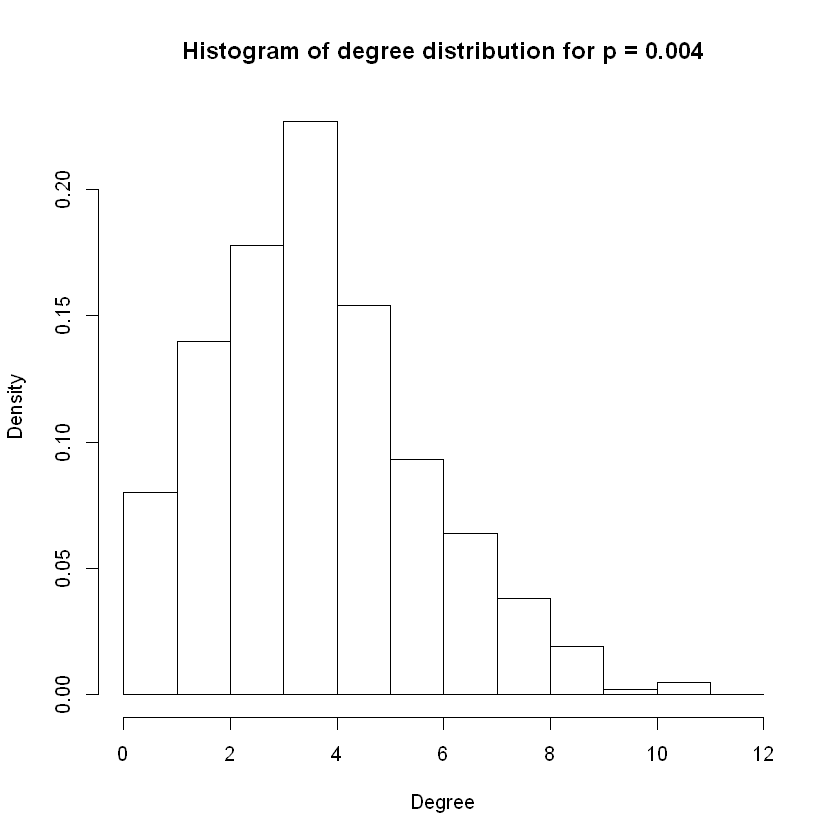

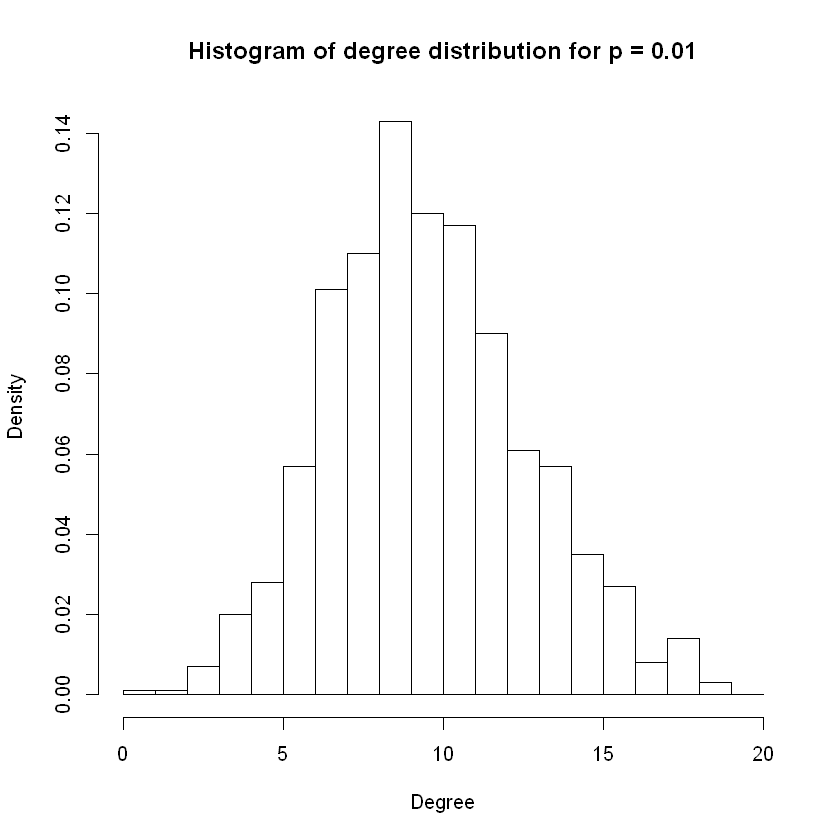

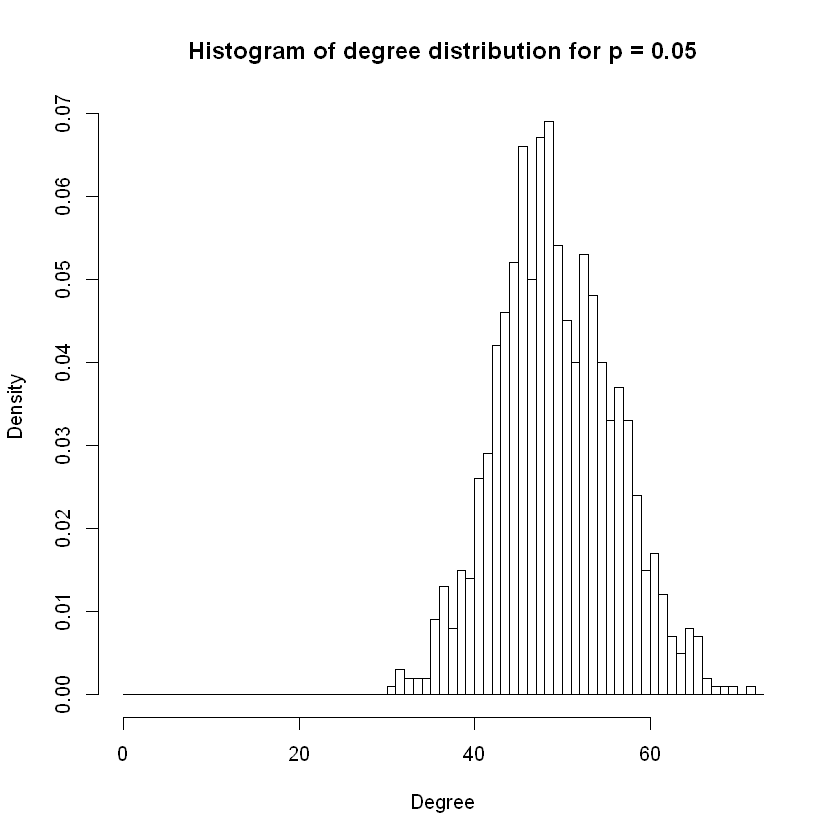

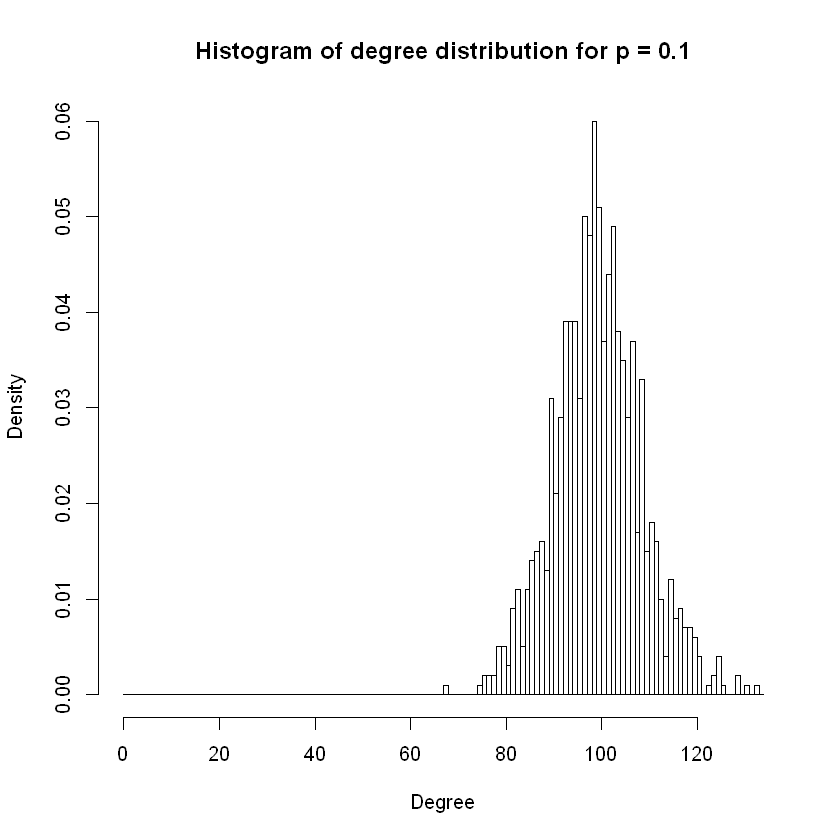

In [3]:
nodes = 1000
iterations = 100

prob1 = 0.003
deg1 = numeric()
diam1 = numeric()
cnt1=numeric()

prob2 = 0.004
deg2 = numeric()
diam2 = numeric()
cnt2=numeric()

prob3 = 0.01
deg3 = numeric()
diam3 = numeric()
cnt3=numeric()

prob4 = 0.05
deg4 = numeric()
diam4 = numeric()
cnt4=numeric()

prob5 = 0.1
deg5 = numeric()
diam5 = numeric()
cnt5=numeric()

#for (i in 1:iterations) {
  graph1 = erdos.renyi.game(nodes, prob1, directed = FALSE)
  deg1 = c(deg1, degree(graph1))
  diam1 = c(diam1, diameter(graph1))
    cnt1 = c(cnt1, as.integer(is.connected(graph1)))
    
  graph2 = erdos.renyi.game(nodes, prob2, directed = FALSE)
  deg2 = c(deg2, degree(graph2))
  diam2 = c(diam2, diameter(graph2))
    cnt2 = c(cnt2, as.integer(is.connected(graph2)))
    
  graph3 = erdos.renyi.game(nodes, prob3, directed = FALSE)
  deg3 = c(deg3, degree(graph3))
  diam3 = c(diam3, diameter(graph3))
    cnt3 = c(cnt3, as.integer(is.connected(graph3)))
    
  graph4 = erdos.renyi.game(nodes, prob4, directed = FALSE)
  deg4 = c(deg4, degree(graph4))
  diam4 = c(diam4, diameter(graph4))
    cnt4 = c(cnt4, as.integer(is.connected(graph4)))
    
  graph5 = erdos.renyi.game(nodes, prob5, directed = FALSE)
  deg5 = c(deg5, degree(graph5))
  diam5 = c(diam5, diameter(graph5))
    cnt5 = c(cnt5, as.integer(is.connected(graph5)))
#}

hist1 = hist(deg1, breaks = seq(from = 0, to = max(deg1) + 1, by = 1), freq = FALSE, main = "Histogram of degree distribution for p = 0.003",xlab = "Degree")
hist2 = hist(deg2, breaks = seq(from = 0, to = max(deg2) + 1, by = 1), freq = FALSE, main = "Histogram of degree distribution for p = 0.004",xlab = "Degree")
hist3 = hist(deg3, breaks = seq(from = 0, to = max(deg3) + 1, by = 1), freq = FALSE, main = "Histogram of degree distribution for p = 0.01",xlab = "Degree")
hist4 = hist(deg4, breaks = seq(from = 0, to = max(deg4) + 1, by = 1), freq = FALSE, main = "Histogram of degree distribution for p = 0.05",xlab = "Degree")
hist5 = hist(deg5, breaks = seq(from = 0, to = max(deg5) + 1, by = 1), freq = FALSE, main = "Histogram of degree distribution for p = 0.1",xlab = "Degree")

In [7]:
mean(deg1)
var(deg1)

mean(deg2)
var(deg2)

mean(deg3)
var(deg3)

mean(deg4)
var(deg4)

mean(deg5)
var(deg5)

[1] 3.018

[1] 2.832509

[1] 4.114

[1] 4.049053

[1] 10.02

[1] 9.637237

[1] 49.822

[1] 44.72704

[1] 99.794

[1] 83.41498

In [11]:
degree.distribution(graph1)

[1] 0.045 0.133 0.236 0.240 0.165 0.100 0.047 0.025 0.005 0.004

In [4]:
is.connected(graph1)
mean(cnt1)
mean(diam1)

is.connected(graph2)
mean(cnt2)
mean(diam2)

is.connected(graph3)
mean(cnt3)
mean(diam3)

is.connected(graph4)
mean(cnt4)
mean(diam4)

is.connected(graph5)
mean(cnt5)
mean(diam5)

[1] FALSE

[1] 0

[1] 13

[1] FALSE

[1] 0

[1] 12

[1] TRUE

[1] 1

[1] 6

[1] TRUE

[1] 1

[1] 3

[1] TRUE

[1] 1

[1] 3

Vertex count 938

character(0)

Diameter 13

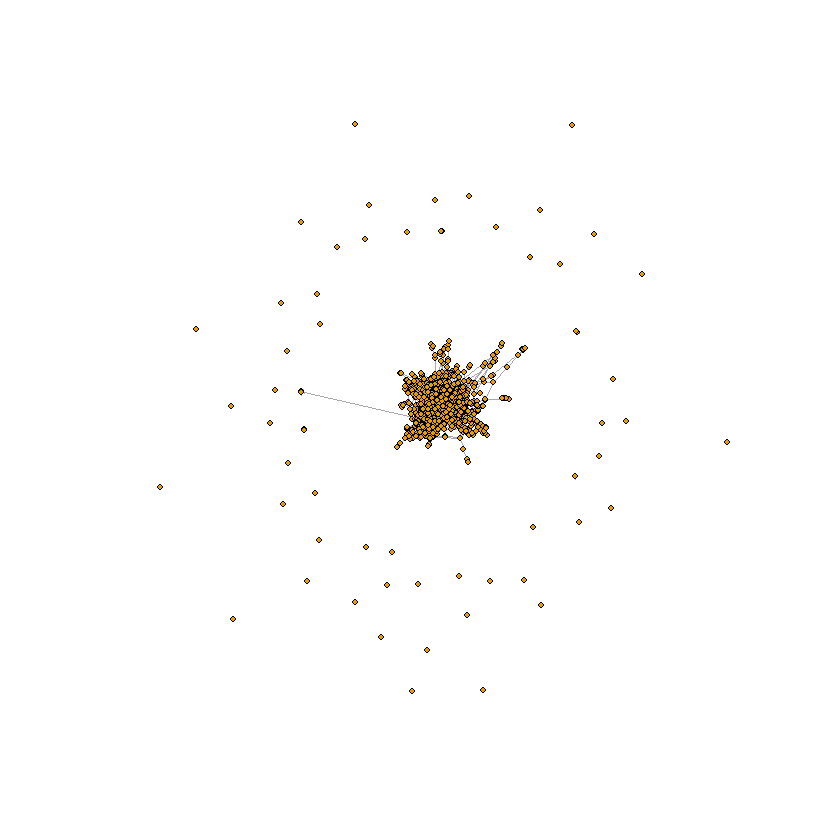

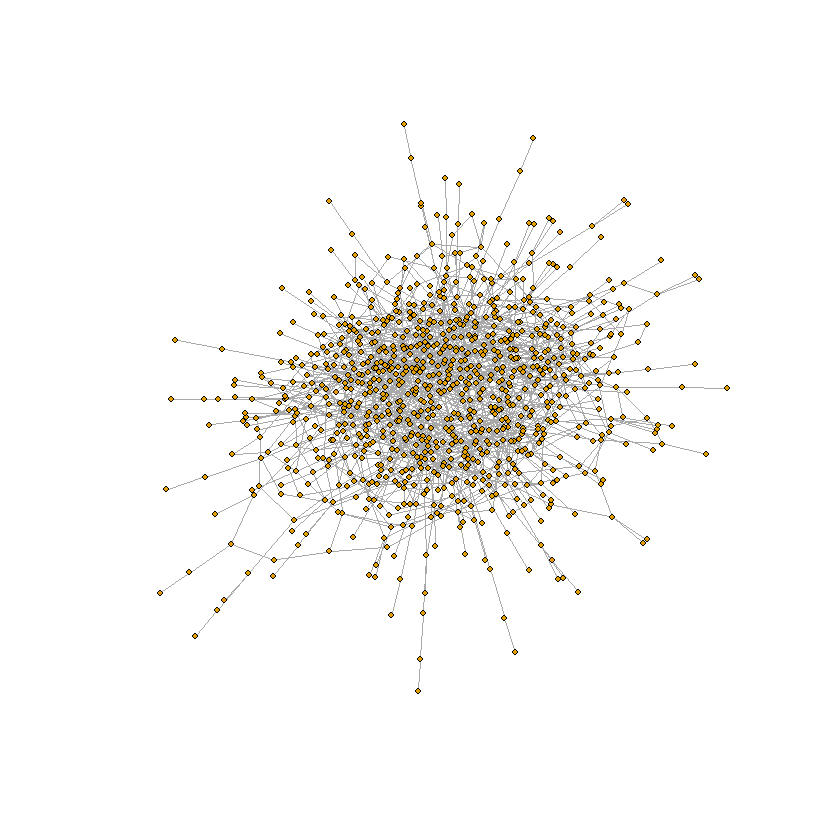

In [15]:
#g1 is not connected
graph_connected_comp <- decompose.graph(graph1)
gcc_index <- which.max(sapply(graph_connected_comp,vcount))
gcc <- graph_connected_comp[[gcc_index]]
vtx<-vcount(gcc)
cat("Vertex count",vtx)
paste()
cat("Diameter",diameter(gcc))
plot( graph1, vertex.size=2, vertex.label=NA, edge.arrow.size=0 )
plot( gcc, vertex.size=2, vertex.label=NA, edge.arrow.size=0 )

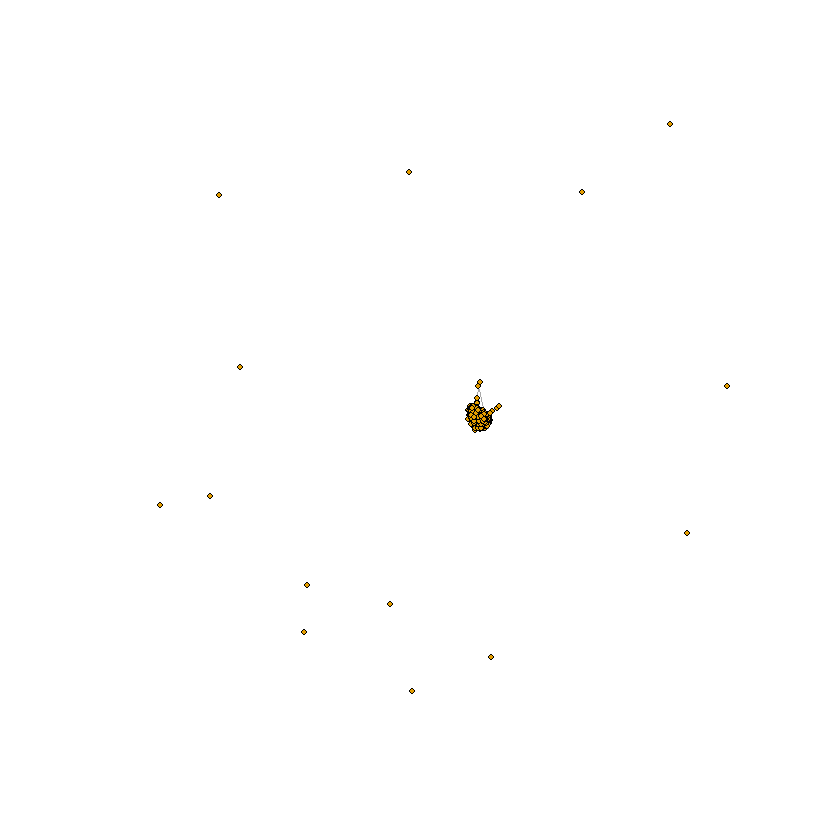

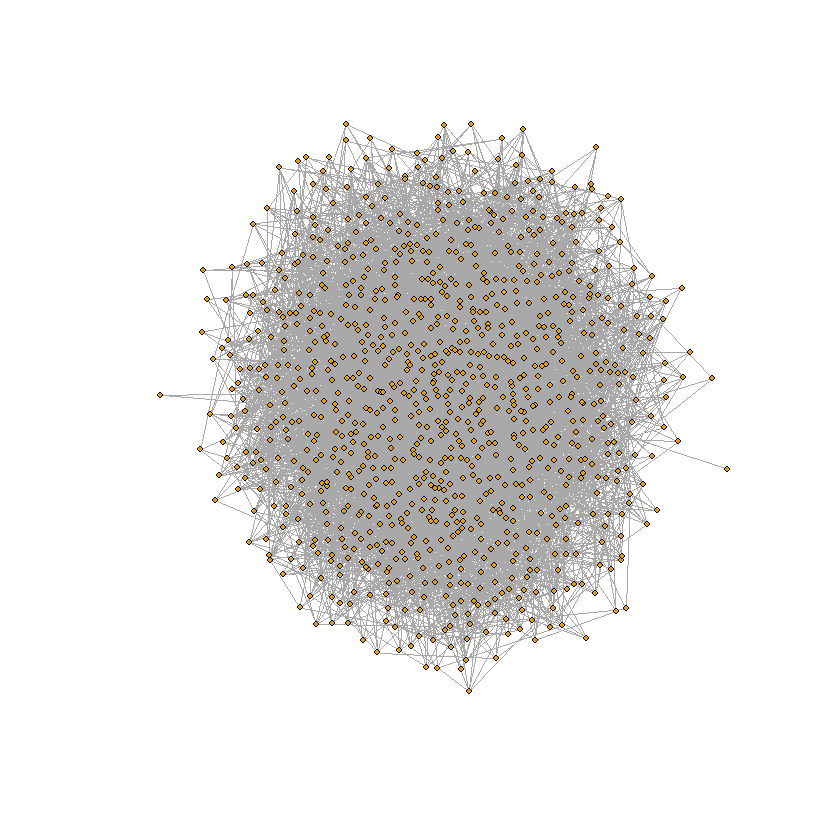

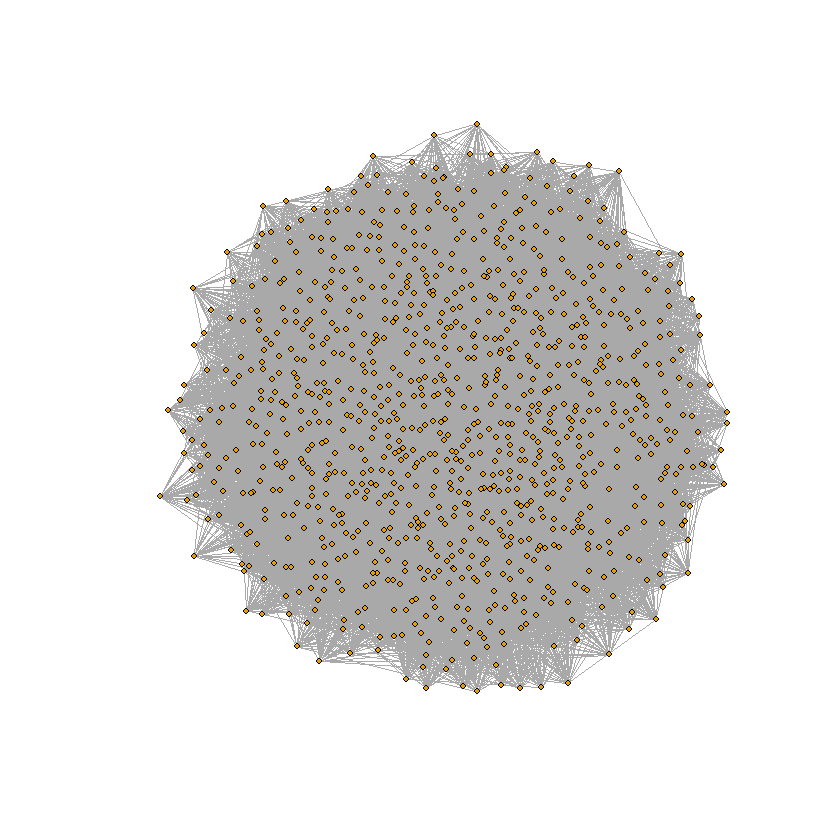

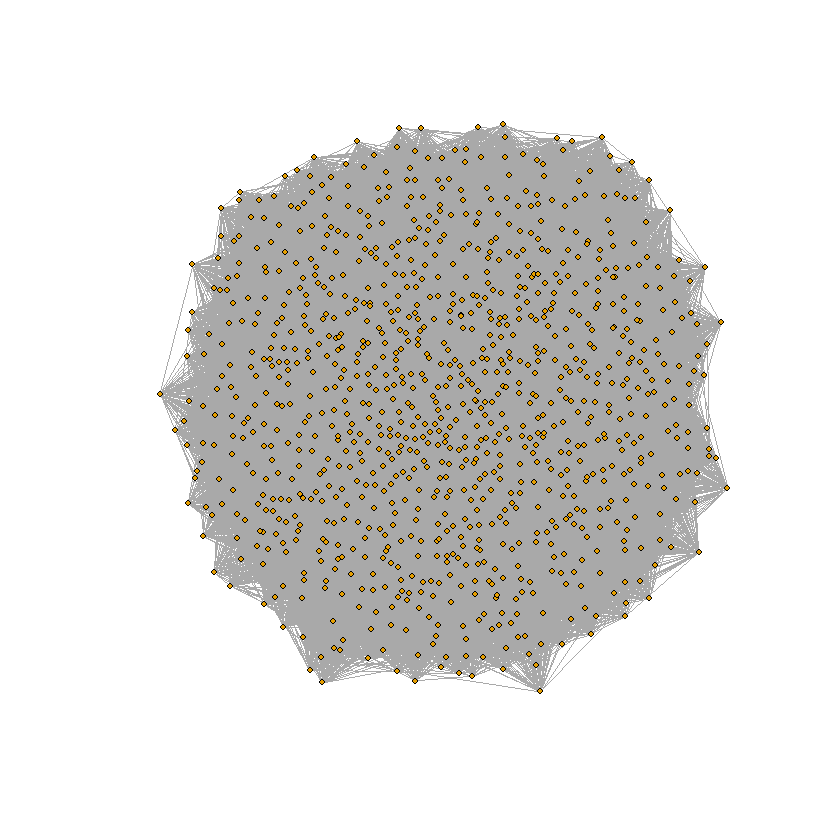

In [5]:
plot( graph2, vertex.size=2, vertex.label=NA, edge.arrow.size=0 )
plot( graph3, vertex.size=2, vertex.label=NA, edge.arrow.size=0 )
plot( graph4, vertex.size=2, vertex.label=NA, edge.arrow.size=0 )
plot( graph5, vertex.size=2, vertex.label=NA, edge.arrow.size=0 )

In [12]:
threshold_prob <- 0.001
random_network4 <- erdos.renyi.game(1000, threshold_prob, type="gnp")
while (!(is_connected(random_network4)))
{
    threshold_prob <- threshold_prob + 0.001
    random_network4 <- erdos.renyi.game(1000, threshold_prob, type="gnp")
}
threshold_prob

[1] 0.008

## Part 1c

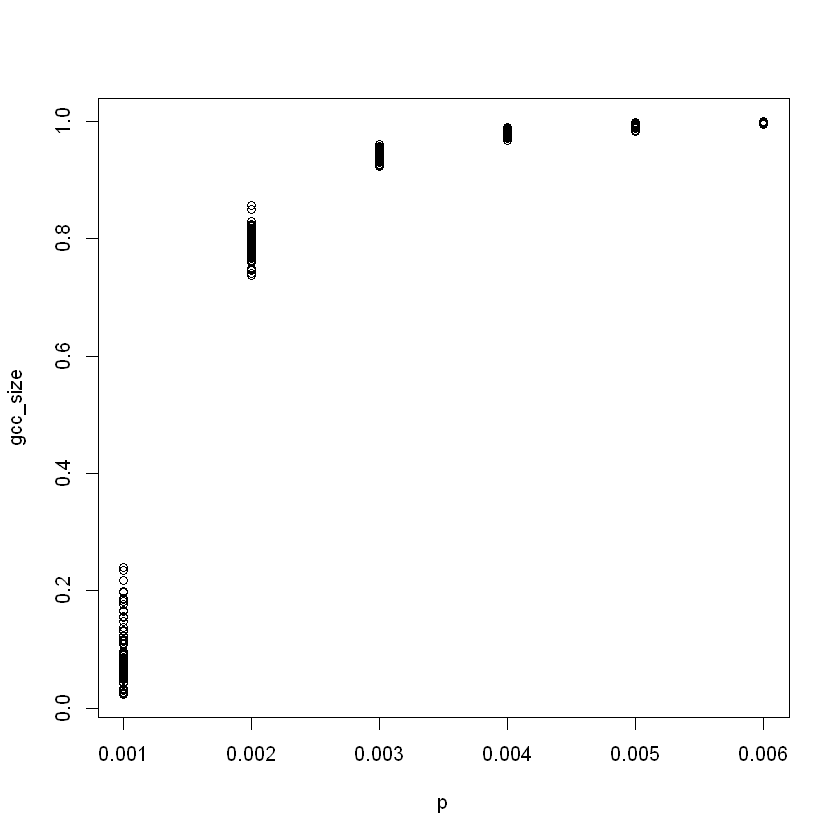

In [2]:
threshold_prob <- 0.001

gcc_size=list()
p=list()
while (threshold_prob<log(1000)/1000)
{
    i=0
    while(i<100)
    {
        netwc <- erdos.renyi.game(1000, threshold_prob, type="gnp")

            graph_connected_comp <- decompose.graph(netwc)
            gcc_index <- which.max(sapply(graph_connected_comp,vcount))
            gcc <- graph_connected_comp[[gcc_index]]
            
            gcc_size=c(gcc_size,vcount(gcc)/vcount(netwc))
            p=c(p,threshold_prob)
        
        i<-i+1
    }
    threshold_prob <- threshold_prob + 0.001
}
plot(p,gcc_size)

In [3]:
threshold_prob
length(gcc_size)

[1] 0.007

[1] 600

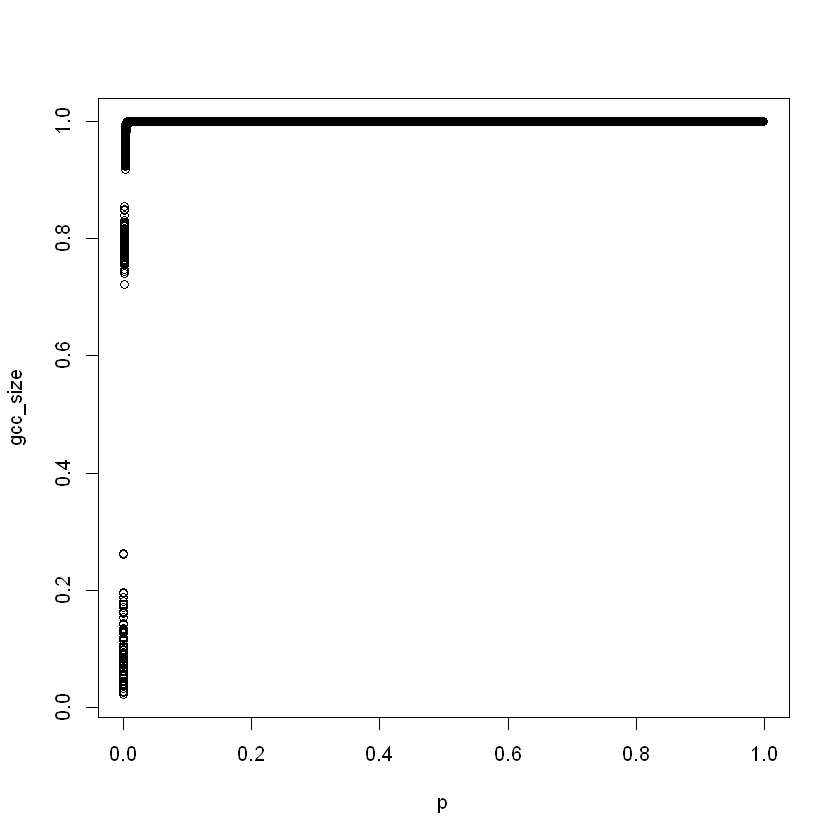

In [4]:
#0.001 to 1
threshold_prob <- 0.001

gcc_size=list()
p=list()
while (threshold_prob<1)
{
    i=0
    while(i<100)
    {
        netwc <- erdos.renyi.game(1000, threshold_prob, type="gnp")

            graph_connected_comp <- decompose.graph(netwc)
            gcc_index <- which.max(sapply(graph_connected_comp,vcount))
            gcc <- graph_connected_comp[[gcc_index]]
            
            gcc_size=c(gcc_size,vcount(gcc)/vcount(netwc))
            p=c(p,threshold_prob)
        
        i<-i+1
    }
    threshold_prob <- threshold_prob + 0.001
}
plot(p,gcc_size)

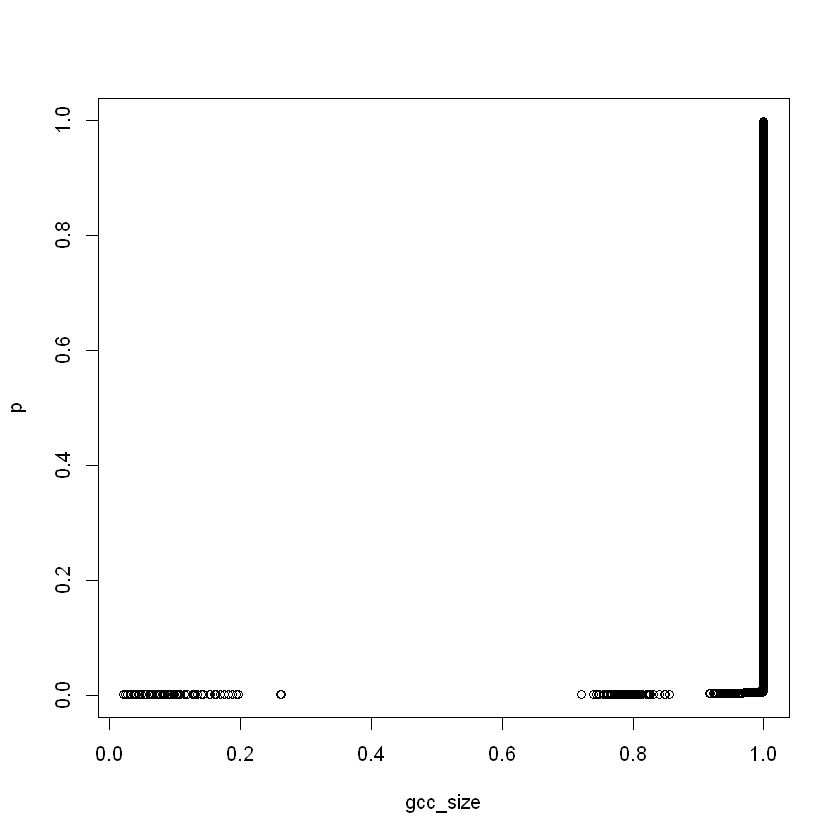

In [5]:
plot(gcc_size,p)

## Part 1d

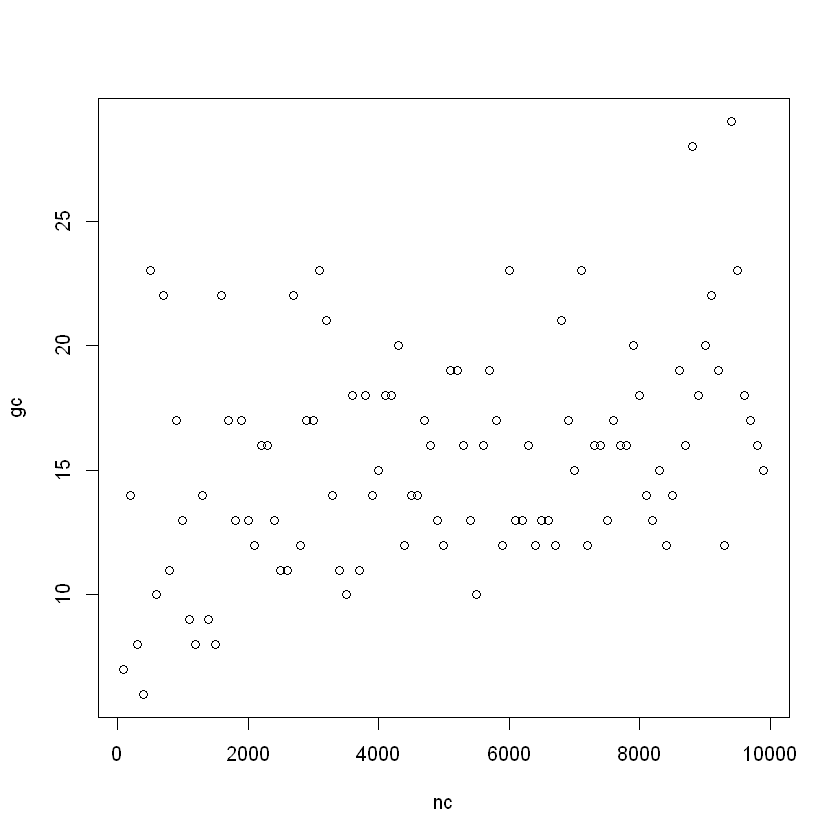

In [2]:
n=100
c=0.5

gc=list()
pc=list()
nc=list()
while(n<10000)
{
    p=c/n
        random_network4 <- erdos.renyi.game(n,p,type="gnp")
#print("here")
            graph_connected_comp <- decompose.graph(random_network4)
            gcc_index <- which.max(sapply(graph_connected_comp,vcount))
            gcc <- graph_connected_comp[[gcc_index]]
            
            gc=c(gc,vcount(gcc))
            pc=c(pc,p)
            nc=c(nc,n)
    n<-n+100
}
plot(nc,gc)

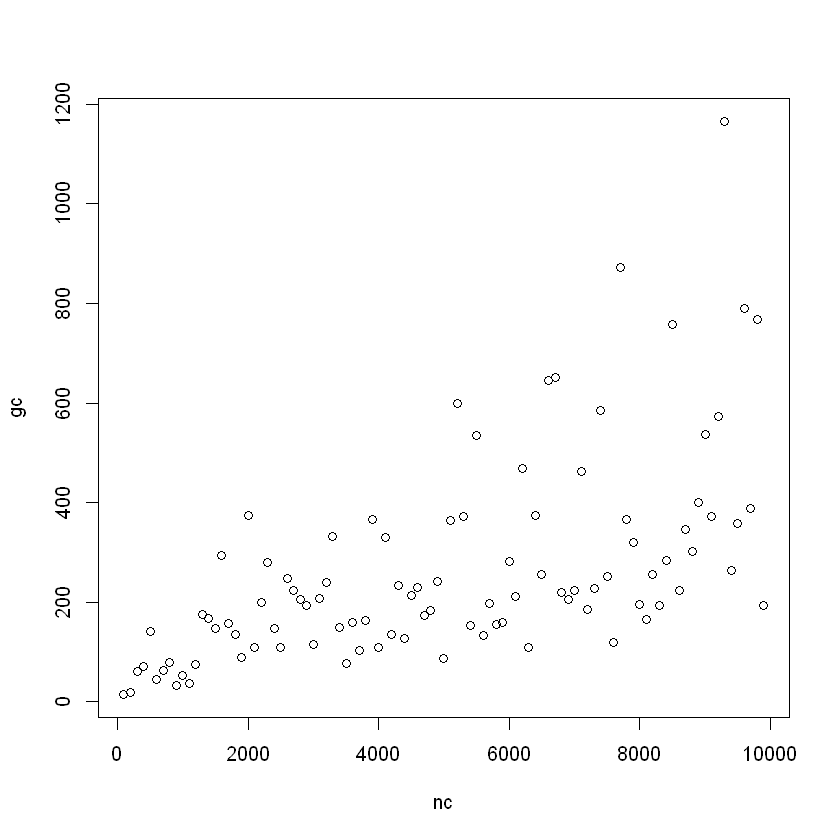

In [3]:
n=100
c=1

gc=list()
pc=list()
nc=list()
while(n<10000)
{
    p=c/n
        random_network4 <- erdos.renyi.game(n,p,type="gnp")
#print("here")
            graph_connected_comp <- decompose.graph(random_network4)
            gcc_index <- which.max(sapply(graph_connected_comp,vcount))
            gcc <- graph_connected_comp[[gcc_index]]
            
            gc=c(gc,vcount(gcc))
            pc=c(pc,p)
            nc=c(nc,n)
    n<-n+100
}
plot(nc,gc)

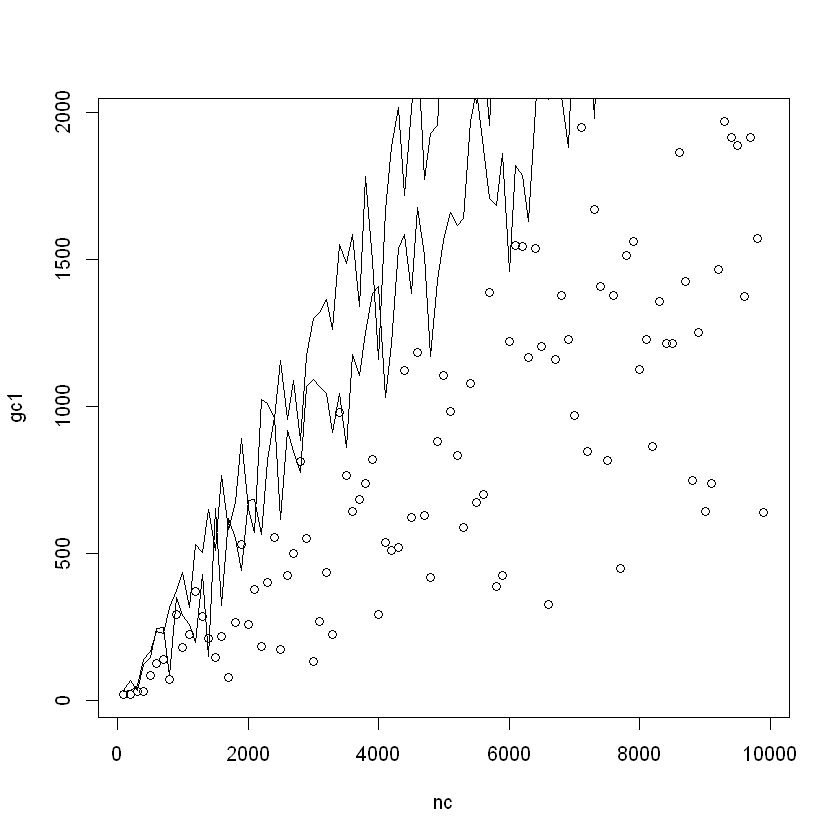

In [4]:
n=100
c1=1.1
c2=1.2
c3=1.3

gc1=list()
gc2=list()
gc3=list()
nc=list()
while(n<10000)
{
    p1=c1/n
    p2=c2/n
    p3=c3/n
    
    gg1 <- erdos.renyi.game(n,p1,type="gnp")
    graph_connected_comp <- decompose.graph(gg1)
    gcc_index <- which.max(sapply(graph_connected_comp,vcount))
    gcc <- graph_connected_comp[[gcc_index]]       
    gc1=c(gc1,vcount(gcc))
    
    gg2 <- erdos.renyi.game(n,p2,type="gnp")
    graph_connected_comp <- decompose.graph(gg2)
    gcc_index <- which.max(sapply(graph_connected_comp,vcount))
    gcc <- graph_connected_comp[[gcc_index]]       
    gc2=c(gc2,vcount(gcc))
    
    gg3 <- erdos.renyi.game(n,p3,type="gnp")
    graph_connected_comp <- decompose.graph(gg3)
    gcc_index <- which.max(sapply(graph_connected_comp,vcount))
    gcc <- graph_connected_comp[[gcc_index]]       
    gc3=c(gc3,vcount(gcc))
    
    nc=c(nc,n)
    n<-n+100
}

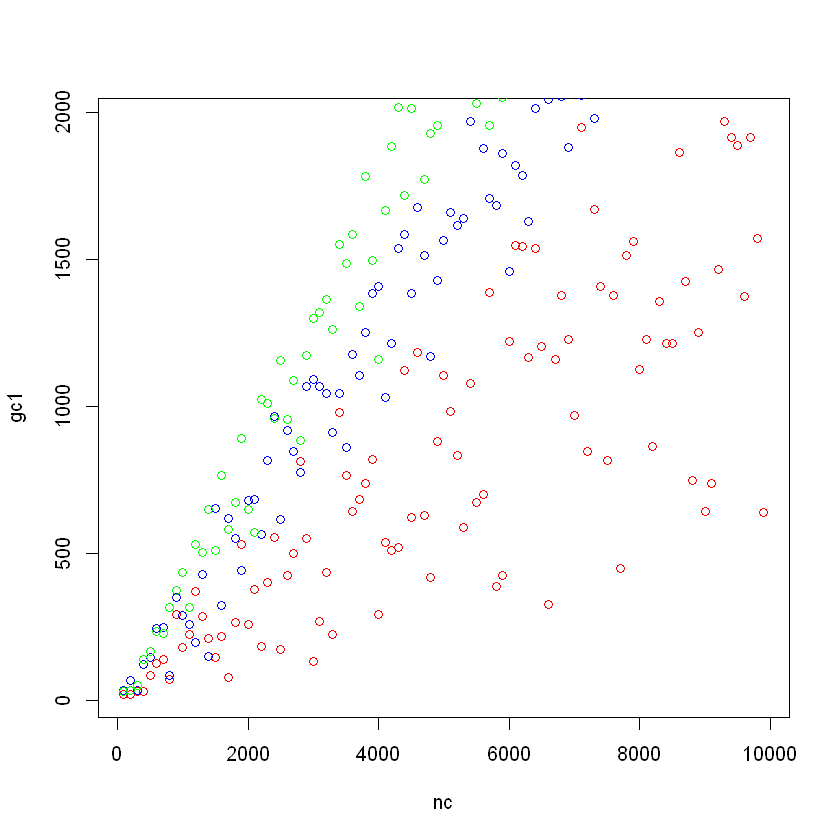

In [9]:
plot(nc,gc1,col="Red")
points(nc,gc2,col="Blue")
points(nc,gc3,col="green")